In [140]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.proportion import proportions_ztest



In [141]:
arff_data = arff.load(open("../data/raw/dataset_churn.arff", "r"))
arff_data


{'description': 'Content\nChurn for bank customers\nRowNumbercorresponds to the record (row) number and has no effect on the output.\nCustomerIdcontains random values and has no effect on customer leaving the bank.\nSurnamethe surname of a customer has no impact on their decision to leave the bank.\nCreditScorecan have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.\nGeographya customers location can affect their decision to leave the bank.\nGenderits interesting to explore whether gender plays a role in a customer leaving the bank.\nAgethis is certainly relevant, since older customers are less likely to leave their bank than younger ones.\nTenurerefers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.\nBalancealso a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the ba

In [142]:
# Convert the ARFF data to a pandas DataFrame
df = pd.DataFrame(arff_data["data"], columns=[attr[0] for attr in arff_data["attributes"]])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:
df.shape

(10000, 14)

In [144]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [145]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [146]:
df["CustomerId"].nunique()

10000

In [147]:
#df.to_csv("../data/raw/dataset_churn.csv", index=True)

In [148]:
df_churn = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df_churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [149]:
df_churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [150]:
# Calculate churn rate
total_customers = df_churn.shape[0]
churned_customers = df_churn[df_churn["Exited"] == 1].shape[0]

# Churn rate calculation
churn_rate = (churned_customers / total_customers) * 100
churn_rate

20.369999999999997

### General Analysis

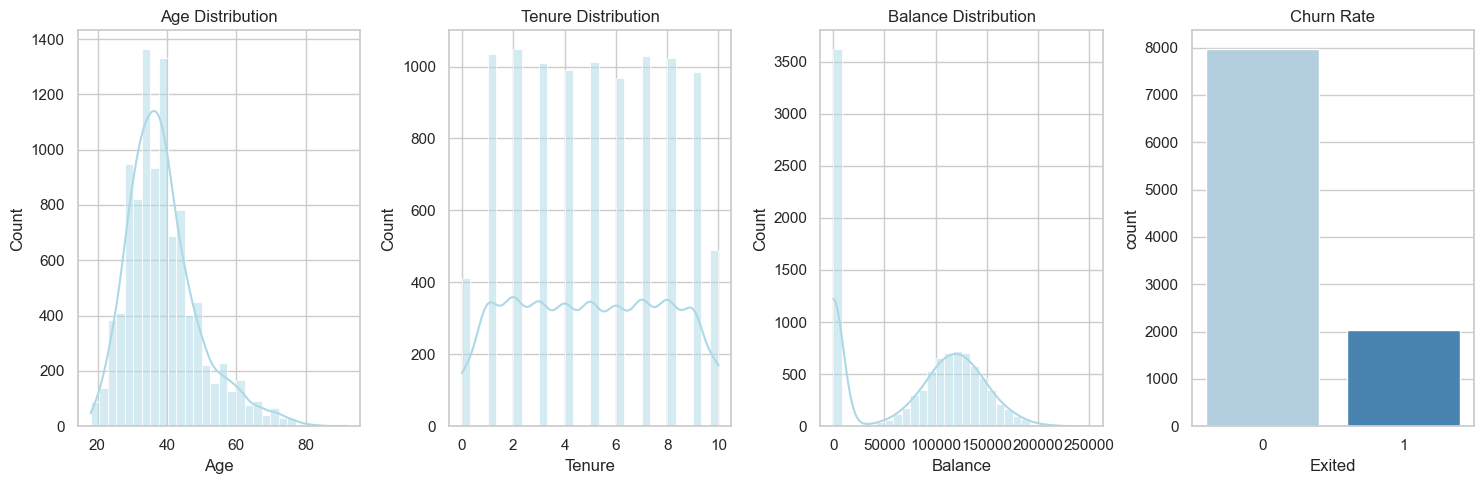

In [151]:
# General Analysis
plt.figure(figsize=(15,5))

# Age Distribution 
plt.subplot(1,4,1)
sns.histplot(df_churn["Age"], bins=30, kde=True, color="lightblue")
plt.title("Age Distribution")
#plt.xlabel("Age")

# Tenure Distribution
plt.subplot(1,4, 2)
sns.histplot(df_churn["Tenure"], bins=30, kde=True, color="lightblue")
plt.title("Tenure Distribution")
#plt.xlabel("Balance")

# Balance Distribution 
plt.subplot(1,4, 3)
sns.histplot(df_churn["Balance"], bins=30, kde=True, color="lightblue")
plt.title("Balance Distribution")
#plt.xlabel("Balance")

# Churn Rate 
plt.subplot(1,4,4)
sns.countplot(x="Exited", data=df_churn, hue= "Exited", legend= False, palette="Blues")
plt.title("Churn Rate")
#plt.xlabel("Exited")



# Show the plots
plt.tight_layout()
plt.show()

### Analysis Churn Rates

In [152]:
#Checking the values
df_new = df_churn.groupby("Geography")["Exited"].value_counts().unstack(fill_value=0)
df_new["Total"] = df_new[0] + df_new[1]
df_new["Percentage_Exited"] = df_new[1] / df_new["Total"] * 100

print(df_new)

Exited        0    1  Total  Percentage_Exited
Geography                                     
France     4204  810   5014          16.154767
Germany    1695  814   2509          32.443204
Spain      2064  413   2477          16.673395


In [153]:
#Checking values
df_churn["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

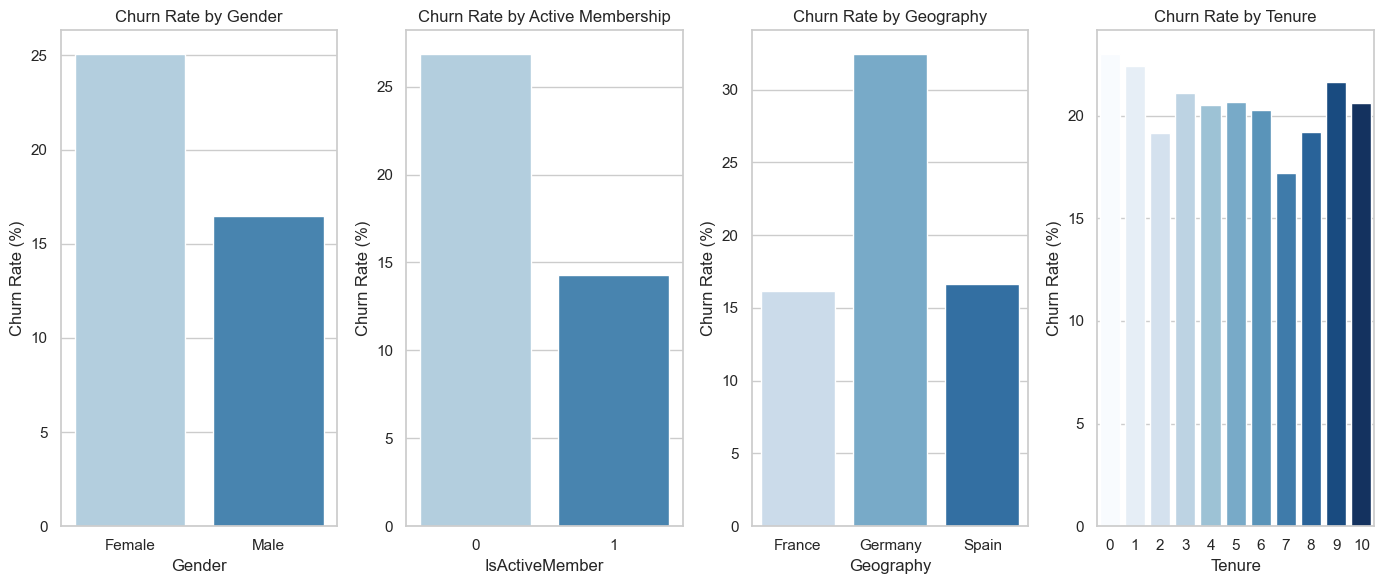

In [154]:
# Calculate the churn rate by Gender, IsActiveMember and Geography
churn_rate_by_gender = df_churn.groupby("Gender")["Exited"].apply(lambda x: (x.sum() / x.count()) * 100)
churn_rate_by_active = df_churn.groupby("IsActiveMember")["Exited"].apply(lambda x: (x.sum() / x.count()) * 100)
churn_rate_by_geography = df_churn.groupby("Geography")["Exited"].apply(lambda x: (x.sum() / x.count()) * 100)
churn_rate_by_tenure = df_churn.groupby("Tenure")["Exited"].apply(lambda x: (x.sum() / x.count()) * 100)

plt.figure(figsize=(14, 6))

# Churn rate by Gender
plt.subplot(1, 4, 1)
sns.barplot(x=churn_rate_by_gender.index, y=churn_rate_by_gender.values, hue= churn_rate_by_gender.index, legend= False, palette="Blues")
plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate (%)")

# Churn rate by IsActiveMember
plt.subplot(1, 4, 2)
sns.barplot(x=churn_rate_by_active.index, y=churn_rate_by_active.values, hue= churn_rate_by_active.index, legend= False, palette="Blues")
plt.title("Churn Rate by Active Membership")
plt.ylabel("Churn Rate (%)")

# Churn rate by Geography
plt.subplot(1, 4, 3)
sns.barplot(x=churn_rate_by_geography.index, y=churn_rate_by_geography.values, hue=churn_rate_by_geography.index, legend= False, palette="Blues")
plt.title("Churn Rate by Geography")
plt.ylabel("Churn Rate (%)")

# Churn rate by Tenure
plt.subplot(1, 4, 4)
sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, hue=churn_rate_by_tenure.index, legend= False, palette="Blues")
plt.title("Churn Rate by Tenure")
plt.ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()

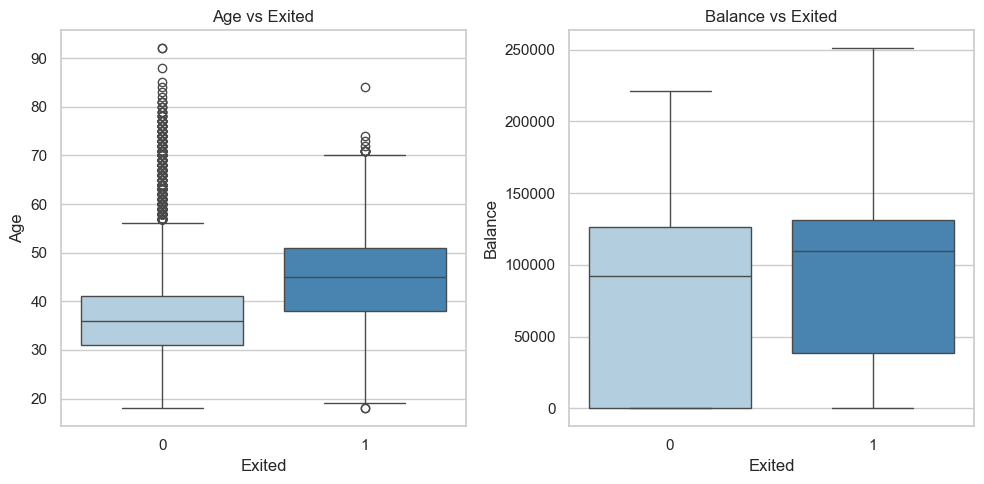

In [155]:

fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Relationship between Age and Exited
sns.boxplot(x="Exited", y="Age", data=df_churn, ax=axes[0], hue="Exited", legend= False, palette="Blues")
axes[0].set_title("Age vs Exited")

# Relationship between Balance and Exited
sns.boxplot(x="Exited", y="Balance", data=df_churn, ax=axes[1], hue="Exited", legend= False,palette="Blues")
axes[1].set_title("Balance vs Exited")

plt.tight_layout()
plt.show()


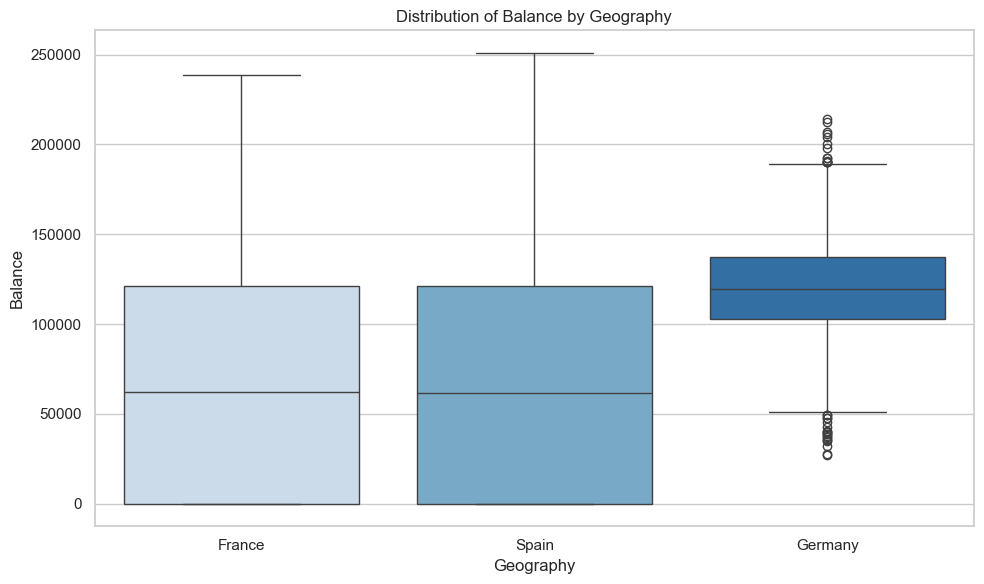

In [156]:
sns.set_palette("Blues")

# Distribution of Balance by Geography
plt.figure(figsize=(10, 6))
sns.boxplot(x="Geography", y="Balance", data=df_churn,hue= "Geography", legend= False, palette="Blues")
plt.title("Distribution of Balance by Geography")
plt.tight_layout()
plt.show()

### Hypothesis testing

#### H0 = Active members are equally or more likely to churn compared to inactive members

In [157]:
# Both columns ("Exited " and "IsActiveMember") are categorical, then it is necessary to use Chi-square test

chi2_active, p_active, _, _ = chi2_contingency(pd.crosstab(df_churn["IsActiveMember"], df_churn["Exited"]))

print(f"Chi-Square Statistic: {chi2_active:.2f}")
print(f"p-value: {p_active:.2e}")

alpha = 0.05

if p_active < alpha:
    print("Reject H0. There is a significant difference between active and inactive members regarding churn.")
else:
    print("Fail to reject H0. No significant difference between active and inactive members regarding churn.")


Chi-Square Statistic: 242.99
p-value: 8.79e-55
Reject H0. There is a significant difference between active and inactive members regarding churn.


In [167]:
churned_inactive = df_churn[df_churn["IsActiveMember"] == 0]["Exited"].sum() # number of inactive members
total_inactive = df_churn[df_churn["IsActiveMember"] == 0]["Exited"].count() # total numbers of inactive members

churned_active = df_churn[df_churn["IsActiveMember"] == 1]["Exited"].sum()
total_active = df_churn[df_churn["IsActiveMember"] == 1]["Exited"].count()

# One-sided z-test for proportions
count = [churned_inactive, churned_active]
totals = [total_inactive, total_active]

z_stat, p_value = proportions_ztest(count, totals, alternative="larger")

print(f"z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value:.2e}")

alpha = 0.05

if p_value < alpha:
    print("Reject H0. Active members are significantly less likely to churn than inactive members.")
else:
    print("Fail to reject H0. There is no significant difference in churn rates between active and inactive members.")

z-statistic: 15.61
p-value: 2.98e-55
Reject H0. Active members are significantly less likely to churn than inactive members.


In [159]:
# Checking results for Churn rate per Active member
churn_rates = df_churn.groupby("IsActiveMember")["Exited"].mean()
churn_rates

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

#### H0 = Customers with higher balances are equally likely to churn as those with lower balances

In [160]:
balance_churned = df_churn[df_churn["Exited"] == 1]["Balance"]
balance_not_churned = df_churn[df_churn["Exited"] == 0]["Balance"]

# Independent two sample ttest 
t_stat_balance, p_value_balance = ttest_ind(balance_churned, balance_not_churned, equal_var=False) # equal_var=False: in case of different variances

print(f't-statistic: {t_stat_balance:.2f}')
print(f'p-value: {p_value_balance:.2e}')

alpha = 0.05

if p_value_balance < alpha:
    print("Reject H0: Customers with higher balances are less likely to churn.")
else:
    print("Fail to reject H0: No significant difference in balances between churned and non-churned customers.")

t-statistic: 12.47
p-value: 6.32e-35
Reject H0: Customers with higher balances are less likely to churn.


### H0 = Older customers are equally or less likely to churn compared to younger customers

In [161]:
age_churned = df_churn[df_churn["Exited"] == 1]["Age"]
age_not_churned = df_churn[df_churn["Exited"] == 0]["Age"]

# Independent two sample ttest 
t_age, p_age = ttest_ind(age_churned, age_not_churned, equal_var=False) # equal_var=False : in case of different variances

print(f"t-statistic: {t_age:.2f}")
print(f"p-value: {p_age:.2e}")

alpha = 0.05

if p_age < alpha:
    print("Reject H0. Older customers are significantly more likely to churn.")
else:
    print("Fail to reject H0. Age does not significantly affect churn.")

t-statistic: 30.42
p-value: 4.71e-179
Reject H0. Older customers are significantly more likely to churn.



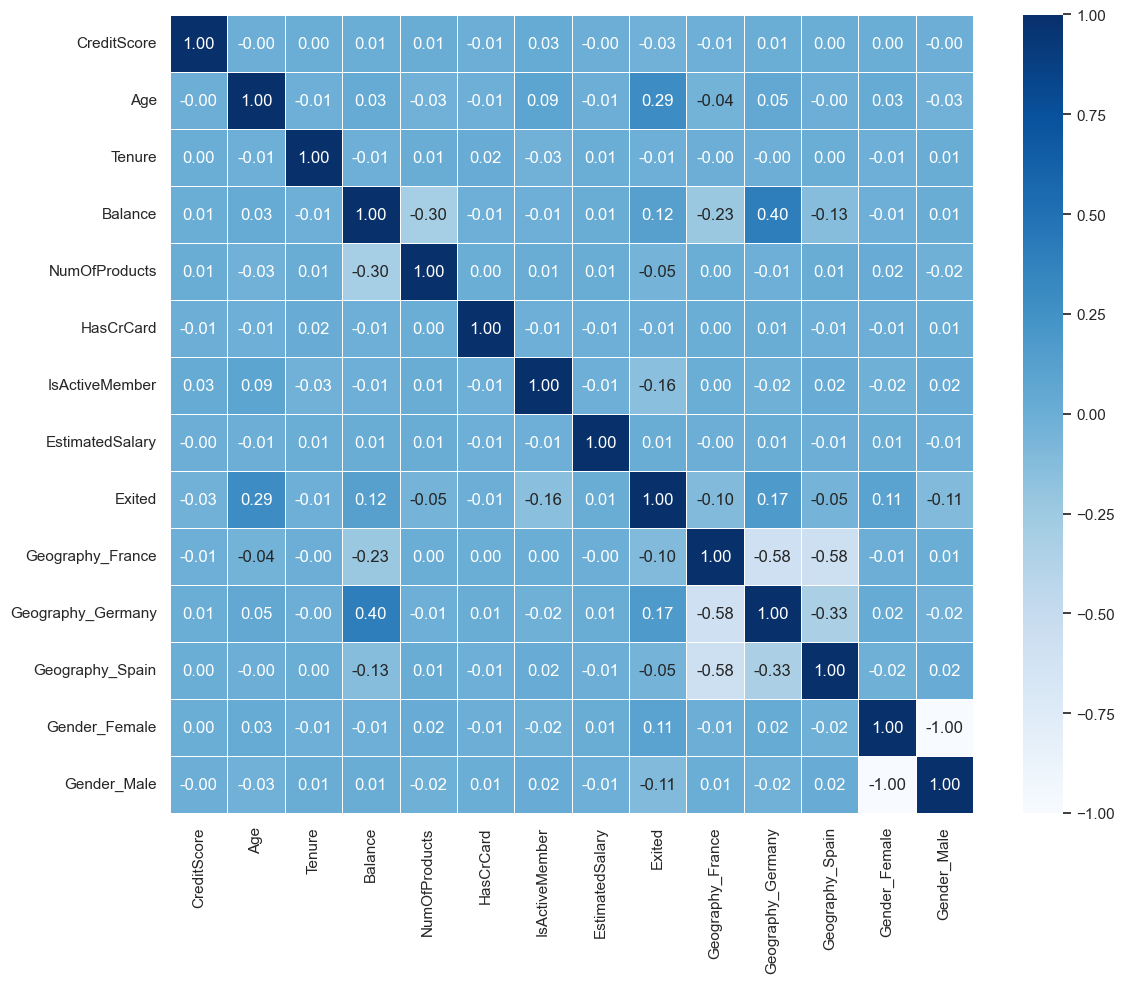

In [162]:
# Encoding categorical columns
df_encoded = pd.get_dummies(df_churn, columns=["Geography", "Gender"])

correlation_matrix_encoded = df_encoded.corr()

# Plotting the heatmap of the correlation matrix with encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.tight_layout()
plt.show()

In [163]:
df_churn["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64